In [1]:
import radical.analytics as ra
import radical.pilot as rp
import radical.utils as ru
import radical.entk as re
#import more_itertools as mit
import os
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
import json
from scipy.optimize import curve_fit
from scipy import stats
from pprint import pprint
from sklearn.metrics import r2_score
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
!radical-stack

/opt/anaconda2/lib/python2.7/site-packages/radical/pilot
/opt/anaconda2/lib/python2.7/site-packages/radical/utils
/opt/anaconda2/lib/python2.7/site-packages/radical/entk
/opt/anaconda2/lib/python2.7/site-packages/radical/saga
/opt/anaconda2/lib/python2.7/site-packages/radical/analytics

  python               : 2.7.14
  pythonpath           : 
  virtualenv           : /home/aymen/jupyter

  radical.analytics    : 0.70.0
  radical.entk         : 0.70.0
  radical.pilot        : 0.70.0
  radical.saga         : 0.70.0
  radical.utils        : 0.70.0



## Design 1

In [5]:
des1DF = pd.DataFrame(columns=['TTX','AgentOverhead','ClientOverhead','EnTKOverhead'])

loc = "/home/aymen/SummerRadical/paper_data/Design1/entk.session-design1-54875/"
src = os.path.dirname(loc)
sid = os.path.basename(loc)

#re_session = ra.Session(sid=sid, stype='radical.entk', src=loc)
rp_session = ra.Session(sid=sid, stype='radical.pilot', src=loc)
units = rp_session.filter(etype='unit', inplace=False)
pilot = rp_session.filter(etype='pilot', inplace=False)
units_duration = units.duration(event=[{ru.EVENT: 'exec_start'},{ru.EVENT: 'exec_stop'}])
units_agent = units.duration([rp.AGENT_STAGING_INPUT, rp.UMGR_STAGING_OUTPUT_PENDING])
units_client = units.duration([rp.NEW, rp.DONE])
#appmanager = re_session.filter(etype='appmanager',inplace=False)
#resource_manager = re_session.filter(etype='resource_manager',inplace=False)
#app_duration = appmanager.duration(event=[{ru.EVENT:"amgr run started"},{ru.EVENT:"start termination"}])
#res_duration = resource_manager.duration(event=[{ru.EVENT:"rreq submitted"},{ru.EVENT:"resource active"}])
#
ttx = units_duration
agent_overhead = units_duration-units_agent 
client_overhead = units_client - units_agent
entk_overhead =  2 #app_duration - units_client - res_duration
des1DF.loc[len(des1DF)] = [ttx, agent_overhead, client_overhead, entk_overhead]

In [24]:
des1DF

,TTX,AgentOverhead,ClientOverhead,EnTKOverhead
0,19219.133676,531.059372,40280.332944,2.0


In [26]:
TTC = (pilot.ttc-(units_duration))-client_overhead

18908.019490242004

## Design 2

In [28]:
des2DF = pd.DataFrame(columns=['TTX','SetupOverhead','SetupOverhead2','AgentOverhead','ClientOverhead'])
sids = ['../../../paper_data/Design2/design2_11K_run5']

for sid in sids:
    
    ## NODE 1
    Node1 = pd.DataFrame(columns=['Start','End','Type'])
    Node1Tilling = pd.read_csv(sid+'/pilot.0000/unit.000002/geolocate1.csv')
    for index,row in Node1Tilling.iterrows():
        Node1.loc[len(Node1)] = [row['Start'],row['End'],'Geo1']
    Node1Tilling = pd.read_csv(sid+'/pilot.0000/unit.000002/geolocate2.csv')
    for index,row in Node1Tilling.iterrows():
        Node1.loc[len(Node1)] = [row['Start'],row['End'],'Geo2']
 
    Node1Tilling = pd.read_csv(sid+'/pilot.0000/unit.000002/ransac1.csv')
    for index,row in Node1Tilling.iterrows():
        Node1.loc[len(Node1)] = [row['Start'],row['End'],'Ransac1']

        
        
    ## NODE 2
    Node2 = pd.DataFrame(columns=['Start','End','Type'])
    Node2Tilling = pd.read_csv(sid+'/pilot.0000/unit.000003/geolocate3.csv')
    for index,row in Node2Tilling.iterrows():
        Node2.loc[len(Node2)] = [row['Start'],row['End'],'Geo3']
    Node2Tilling = pd.read_csv(sid+'/pilot.0000/unit.000003/geolocate4.csv')
    for index,row in Node2Tilling.iterrows():
        Node2.loc[len(Node2)] = [row['Start'],row['End'],'Geo4']

    Node2Tilling = pd.read_csv(sid+'/pilot.0000/unit.000003/ransac2.csv')
    for index,row in Node2Tilling.iterrows():
        Node2.loc[len(Node2)] = [row['Start'],row['End'],'Ransac2']

        
    ## NODE 3
    Node3 = pd.DataFrame(columns=['Start','End','Type'])
    Node3Tilling = pd.read_csv(sid+'/pilot.0000/unit.000004/geolocate5.csv')
    for index,row in Node3Tilling.iterrows():
        Node3.loc[len(Node3)] = [row['Start'],row['End'],'Geo5']
    Node3Tilling = pd.read_csv(sid+'/pilot.0000/unit.000004/geolocate6.csv')
    for index,row in Node3Tilling.iterrows():
        Node3.loc[len(Node3)] = [row['Start'],row['End'],'Geo6']
    
    Node3Tilling = pd.read_csv(sid+'/pilot.0000/unit.000004/ransac3.csv')
    for index,row in Node3Tilling.iterrows():
        Node3.loc[len(Node3)] = [row['Start'],row['End'],'Ransac3']
   
        
    ## NODE 4
    Node4 = pd.DataFrame(columns=['Start','End','Type'])
    Node4Tilling = pd.read_csv(sid+'/pilot.0000/unit.000005/geolocate7.csv')
    for index,row in Node4Tilling.iterrows():
        Node4.loc[len(Node4)] = [row['Start'],row['End'],'Geo7']
    Node4Tilling = pd.read_csv(sid+'/pilot.0000/unit.000005/geolocate8.csv')
    for index,row in Node4Tilling.iterrows():
        Node4.loc[len(Node4)] = [row['Start'],row['End'],'Geo8']
    
    Node4Tilling = pd.read_csv(sid+'/pilot.0000/unit.000005/ransac4.csv')
    for index,row in Node4Tilling.iterrows():
        Node4.loc[len(Node4)] = [row['Start'],row['End'],'Ransac4']
    
    AllNodes = pd.DataFrame(columns=['Start','End','Type'])
    AllNodes = AllNodes.append(Node1)
    AllNodes = AllNodes.append(Node2)
    AllNodes = AllNodes.append(Node3)
    AllNodes = AllNodes.append(Node4)
    AllNodes.reset_index(inplace=True,drop='index')
    rp_sessionDes2 = ra.Session(stype='radical.pilot',src=sid)
    unitsDes2 = rp_sessionDes2.filter(etype='unit', inplace=False)
    execUnits = unitsDes2.filter(uid=['unit.000002','unit.000003','unit.000004','unit.000005'],inplace=False)
    exec_units_setup_des2 = execUnits.duration(event=[{ru.EVENT: 'exec_start'},{ru.EVENT: 'exec_stop'}])
    exec_units_agent_des2 = execUnits.duration([rp.AGENT_STAGING_INPUT, rp.UMGR_STAGING_OUTPUT_PENDING])
    exec_units_clientDes2 = execUnits.duration([rp.NEW, rp.DONE])
    SetupUnit = unitsDes2.filter(uid=['unit.000000'],inplace=False)
    setup_units_clientDes2 = SetupUnit.duration(event=[{ru.STATE: rp.NEW},{ru.EVENT: 'exec_start'}])
    pilotDes2 = rp_sessionDes2.filter(etype='pilot', inplace=False)
    pilot_duration = pilotDes2.duration([rp.PMGR_ACTIVE,rp.FINAL])
    des2_duration = AllNodes['End'].max() - AllNodes['Start'].min()
    setupDes2_overhead = exec_units_setup_des2 - des2_duration
    agentDes2_overhead = exec_units_agent_des2 - exec_units_setup_des2
    clientDes2_overhead = exec_units_clientDes2 - exec_units_agent_des2

    des2DF.loc[len(des2DF)] = [des2_duration, setup_units_clientDes2, setupDes2_overhead, agentDes2_overhead, clientDes2_overhead]

In [29]:
des2DF*2

,TTX,SetupOverhead,SetupOverhead2,AgentOverhead,ClientOverhead
0,13407.704391,163.358526,14.102488,0.37222,44.549024


## Design 2A

In [30]:
sid='../../../paper_data/Design2a/design2a_11k_test5/'
rp_sessionDes2 = ra.Session(stype='radical.pilot',src=sid)
unitsDes2 = rp_sessionDes2.filter(etype='unit', inplace=False)
execUnits = unitsDes2.filter(uid=['unit.000002','unit.000003','unit.000004','unit.000001'],inplace=False)
exec_units_setup_des2 = execUnits.duration(event=[{ru.EVENT: 'exec_start'},{ru.EVENT: 'exec_stop'}])
exec_units_agent_des2 = execUnits.duration([rp.AGENT_STAGING_INPUT, rp.UMGR_STAGING_OUTPUT_PENDING])
exec_units_clientDes2 = execUnits.duration([rp.NEW, rp.DONE])
SetupUnit = unitsDes2.filter(uid=['unit.000000'],inplace=False)
setup_units_clientDes2 = SetupUnit.duration(event=[{ru.STATE: rp.NEW},{ru.EVENT: 'exec_start'}])
pilotDes2 = rp_sessionDes2.filter(etype='pilot', inplace=False)

In [32]:
Node1 = pd.DataFrame(columns=['Start','End','Type'])
Node1Tilling = pd.read_csv('../../../paper_data/Design2a/design2a_11k_test5/pilot.0000/unit.000000/geolocate1.csv')
for index,row in Node1Tilling.iterrows():
    Node1.loc[len(Node1)] = [row['Start'],row['End'],'Geo1']
Node1Tilling = pd.read_csv('../../../paper_data/Design2a/design2a_11k_test5/pilot.0000/unit.000000/geolocate2.csv')
for index,row in Node1Tilling.iterrows():
    Node1.loc[len(Node1)] = [row['Start'],row['End'],'Geo2']

Node1Tilling = pd.read_csv('../../../paper_data/Design2a/design2a_11k_test5/pilot.0000/unit.000000/ransac1.csv')
for index,row in Node1Tilling.iterrows():
    Node1.loc[len(Node1)] = [row['Start'],row['End'],'Ransac1']


In [33]:
Node2 = pd.DataFrame(columns=['Start','End','Type'])
Node2Tilling = pd.read_csv('../../../paper_data/Design2a/design2a_11k_test5/pilot.0000/unit.000001/geolocate3.csv')
for index,row in Node2Tilling.iterrows():
    Node2.loc[len(Node2)] = [row['Start'],row['End'],'Geo3']
Node2Tilling = pd.read_csv('../../../paper_data/Design2a/design2a_11k_test5/pilot.0000/unit.000001/geolocate4.csv')
for index,row in Node2Tilling.iterrows():
    Node2.loc[len(Node2)] = [row['Start'],row['End'],'Geo4']

Node2Tilling = pd.read_csv('../../../paper_data/Design2a/design2a_11k_test5/pilot.0000/unit.000001/ransac2.csv')
for index,row in Node2Tilling.iterrows():
    Node2.loc[len(Node2)] = [row['Start'],row['End'],'Ransac2']

In [34]:
Node3 = pd.DataFrame(columns=['Start','End','Type'])
Node3Tilling = pd.read_csv('../../../paper_data/Design2a/design2a_11k_test5/pilot.0000/unit.000002/geolocate5.csv')
for index,row in Node3Tilling.iterrows():
    Node3.loc[len(Node3)] = [row['Start'],row['End'],'Geo5']
Node3Tilling = pd.read_csv('../../../paper_data/Design2a/design2a_11k_test5/pilot.0000/unit.000002/geolocate6.csv')
for index,row in Node3Tilling.iterrows():
    Node3.loc[len(Node3)] = [row['Start'],row['End'],'Geo6']

Node3Tilling = pd.read_csv('../../../paper_data/Design2a/design2a_11k_test5/pilot.0000/unit.000002/ransac3.csv')
for index,row in Node3Tilling.iterrows():
    Node3.loc[len(Node3)] = [row['Start'],row['End'],'Ransac3']


In [36]:
Node4 = pd.DataFrame(columns=['Start','End','Type'])
Node4Tilling = pd.read_csv('../../../paper_data/Design2a/design2a_11k_test5/pilot.0000/unit.000003/geolocate7.csv')
for index,row in Node4Tilling.iterrows():
    Node4.loc[len(Node4)] = [row['Start'],row['End'],'Geo7']
Node4Tilling = pd.read_csv('../../../paper_data/Design2a/design2a_11k_test5/pilot.0000/unit.000003/geolocate8.csv')
for index,row in Node4Tilling.iterrows():
    Node4.loc[len(Node4)] = [row['Start'],row['End'],'Geo8']

Node4Tilling = pd.read_csv('../../../paper_data/Design2a/design2a_11k_test5/pilot.0000/unit.000003/ransac4.csv')
for index,row in Node4Tilling.iterrows():
    Node4.loc[len(Node4)] = [row['Start'],row['End'],'Ransac4']


In [47]:
des2ADF = pd.DataFrame(columns=['TTX','SetupOverhead','AgentOverhead','ClientOverhead'])
AllNodes = pd.DataFrame(columns=['Start','End','Type'])
AllNodes = AllNodes.append(Node1)
AllNodes = AllNodes.append(Node2)
AllNodes = AllNodes.append(Node3)
AllNodes = AllNodes.append(Node4)
AllNodes.reset_index(inplace=True,drop='index')
rp_sessionDes2 = ra.Session(stype='radical.pilot',src=sid)
unitsDes2 = rp_sessionDes2.filter(etype='unit', inplace=False)
execUnits = unitsDes2.filter(uid=['unit.000000','unit.000001','unit.000002','unit.000003'],inplace=False)
exec_units_setup_des2 = unitsDes2.duration(event=[{ru.EVENT: 'exec_start'},{ru.EVENT: 'exec_stop'}])
exec_units_agent_des2 = unitsDes2.duration([rp.AGENT_STAGING_INPUT, rp.UMGR_STAGING_OUTPUT_PENDING])
exec_units_clientDes2 = execUnits.duration([rp.NEW, rp.DONE])
pilotDes2 = rp_sessionDes2.filter(etype='pilot', inplace=False)
pilot_duration = pilotDes2.duration([rp.PMGR_ACTIVE,rp.FINAL])
des2_duration = AllNodes['End'].max() - AllNodes['Start'].min()
setupDes2_overhead = exec_units_setup_des2 - des2_duration
agentDes2_overhead = exec_units_agent_des2 - exec_units_setup_des2
clientDes2_overhead = exec_units_clientDes2 - exec_units_agent_des2
queue_time = max(pilotDes2.timestamps(event=[{ru.STATE: rp.PMGR_ACTIVE}]))- max(execUnits.timestamps(event=[{ru.STATE: rp.AGENT_STAGING_INPUT_PENDING}]))
des2ADF.loc[len(des2ADF)] = [des2_duration, setupDes2_overhead, agentDes2_overhead, clientDes2_overhead-queue_time]

In [241]:
des1DF

,TTX,AgentOverhead,ClientOverhead,EnTKOverhead
0,19219.133676,531.059372,40280.332944,2.0


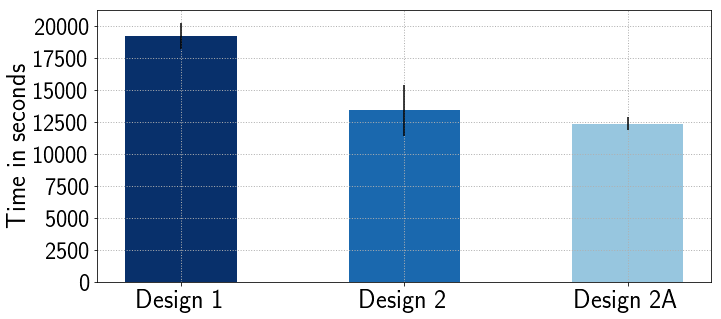

In [250]:
fig, axis = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(11,5)
x1 = np.arange(3)
_ = axis.bar(x1[0],des1DF['TTX'].mean(),yerr=1000, color=blues(300),width=0.5,label='Design 1 TTX')

_ = axis.bar(x1[1],des2DF['TTX'].mean()*2,yerr = 2000,width=0.5, color=blues(200), label='Design 2 TTX')

_ = axis.bar(x1[2],des2ADF['TTX'].mean()*2,yerr=502.6696,width=0.5, color=blues(100), label='Design 2A TTX')


_ = axis.set_xticks([0,1,2])
_ = axis.grid(which='both', linestyle=':', linewidth=1)
_ = axis.set_xticklabels(['Design 1', 'Design 2','Design 2A'], fontsize=26)
_ = axis.set_ylabel('Time in seconds', fontsize=26)

_ = axis.set_yticklabels(axis.get_yticks().astype('int').tolist(),fontsize=24)
fig.savefig('../Data/geo_ttx.pdf',dpi=800,bbox='tight')

In [50]:
dist_overhead = np.load('../Data/dist_dataset.npy')

In [166]:
DiscDurations = [1861.404363739,
1872.631383787,
1870.355146581,
1852.347904858,
1857.771844937,
1868.644424397,
1873.176510421,
1851.527881958,
1870.128898667,
1856.676059379]

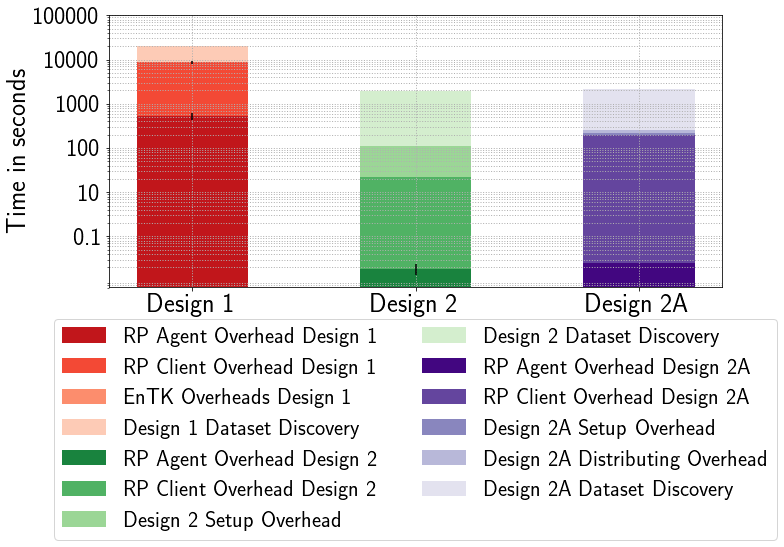

In [323]:
fig, axis = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(11,5)
x1 = np.arange(3)

_ = axis.bar(x1[0], des1DF['AgentOverhead'].mean(),yerr=100,width=0.5, color=reds(200),label='RP Agent Overhead Design 1')
_ = axis.bar(x1[0], des1DF['ClientOverhead'].mean()*0.2,yerr=500.858521002, bottom=des1DF['AgentOverhead'].mean(),width=0.5, color=reds(150),label='RP Client Overhead Design 1')
_ = axis.bar(x1[0], des1DF['EnTKOverhead'].mean(),yerr=0, bottom=des1DF['ClientOverhead'].mean()+des1DF['AgentOverhead'].mean(),width=0.5, color=reds(100),label='EnTK Overheads Design 1')
_ = axis.bar(x1[0], np.mean(DiscDurations)*6, yerr=np.std(DiscDurations), bottom=des1DF['ClientOverhead'].mean()*0.2+des1DF['AgentOverhead'].mean() + des1DF['EnTKOverhead'].mean(), 
                width=0.5, color=reds(50),label='Design 1 Dataset Discovery')

_ = axis.bar(x1[1],des2DF['AgentOverhead'].mean(),yerr=0.052,width=0.5, color=greens(200),label='RP Agent Overhead Design 2')
_ = axis.bar(x1[1],des2DF['ClientOverhead'].mean(),yerr=0.174,bottom=des2DF['AgentOverhead'].mean(),width=0.5, color=greens(150),label='RP Client Overhead Design 2')
_ = axis.bar(x1[1],(des2DF['SetupOverhead']+des2DF['SetupOverhead2']).mean(),yerr=(des2DF['SetupOverhead']+des2DF['SetupOverhead2']).std(),bottom=des2DF['ClientOverhead'].mean()+des2DF['AgentOverhead'].mean(),width=0.5, color=greens(100),label='Design 2 Setup Overhead')
_ = axis.bar(x1[1],np.mean(DiscDurations), yerr=np.std(DiscDurations), bottom=des2DF['ClientOverhead'].mean()+des2DF['AgentOverhead'].mean() + (des2DF['SetupOverhead']+des2DF['SetupOverhead2']).mean(),
                width=0.5, color=greens(50),label='Design 2 Dataset Discovery')


_ = axis.bar(x1[2],des2ADF['AgentOverhead'].mean(),yerr=des2ADF['AgentOverhead'].std(),width=0.5, color=purples(250),label='RP Agent Overhead Design 2A',log=1)
_ = axis.bar(x1[2],des2ADF['ClientOverhead'].mean(),yerr=des2ADF['ClientOverhead'].std(),bottom=des2ADF['AgentOverhead'].mean(),width=0.5, color=purples(200),label='RP Client Overhead Design 2A',)
_ = axis.bar(x1[2],des2ADF['SetupOverhead'].mean(),yerr=des2ADF['SetupOverhead'].std(),bottom=des2ADF['ClientOverhead'].mean()+des2ADF['AgentOverhead'].mean(),width=0.5, color=purples(150),label='Design 2A Setup Overhead')


_ = axis.bar(x1[2],dist_overhead.mean(),yerr=dist_overhead.std(),bottom=des2ADF['ClientOverhead'].mean()+des2ADF['AgentOverhead'].mean()+des2ADF['SetupOverhead'].mean(),width=0.5, color=purples(100),label='Design 2A Distributing Overhead')
_ = axis.bar(x1[2],np.mean(DiscDurations), yerr=np.std(DiscDurations),bottom=des2ADF['ClientOverhead'].mean()+des2ADF['AgentOverhead'].mean()+des2ADF['SetupOverhead'].mean() + dist_overhead.mean(),width=0.5, color=purples(50),label='Design 2A Dataset Discovery')

_ = axis.set_xticks([0,1,2])


_ = axis.grid(which='both', linestyle=':', linewidth=1)
_ = axis.set_ylabel('Time in seconds', fontsize=26)
_ = axis.set_xticklabels(['Design 1', 'Design 2','Design 2A'], fontsize=26)

_ = axis.set_yticks([1,10,100,1000,10000,100000])
_ = axis.set_yticklabels(['0.1']+axis.get_yticks()[1:].astype('int').tolist(),fontsize=24)
_ = axis.legend(fontsize=22,loc = 'lower center', bbox_to_anchor = (0,-0.97,1,1), ncol=2)
# fig.subplots_adjust(bottom=.405)
fig.savefig('../Data/geo_overheads.pdf',dpi=800,bbox_inches='tight')

In [246]:
des2DF['TTX'].std()

nan

In [200]:
TTQ = 37219.27881901
Entk_overhead = des1DF['ClientOverhead'].mean()-8056.066588878632 - TTQ
abs(Entk_overhead)

4995.01246349547